PCA for Data Visualization

In [24]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length', 'sepal width',
                 'petal length', 'petal width', 'target'])

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1. Standardize the data

In [25]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']
target = ['target']

# features
x = df.loc[:, features].values

# target
y = df.loc[:, target].values

# standardize the features
x = StandardScaler().fit_transform(x)

2. PCA Projection to 2D

In [26]:
from sklearn.decomposition import PCA

components_count = 2
components_labels = [f'PC{x}' for x in range(1, components_count + 1)]

pca = PCA(n_components=components_count)

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data=principal_components, columns=components_labels)

principal_df.head()

,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [27]:
final_df = pd.concat([principal_df, df[target]], axis=1)

final_df.head()

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


3. Visualize 2D Projection

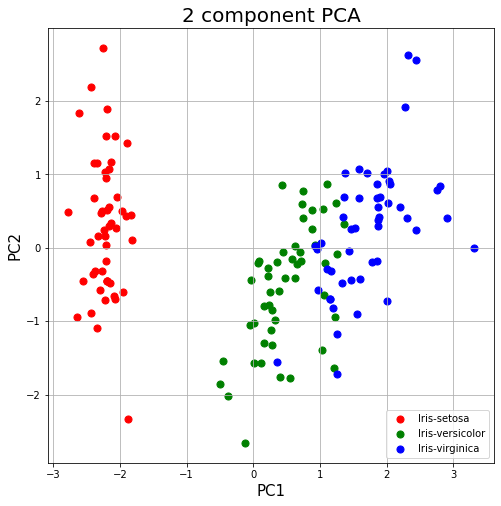

In [28]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'PC1'],
               final_df.loc[indicesToKeep, 'PC2'], 
               c=color, s=50)
ax.legend(targets)
ax.grid()


4. Explained Variance

In [29]:
pc_count = 2

def format_percent(x):
  x *= 100
  x = round(x, 2)
  return str(x) + '%'

total_var_percent = sum(pca.explained_variance_ratio_)
print(f'The {pc_count} principal components contain {format_percent(total_var_percent)} of the information')


pcs = ['PC' + str(x) for x in range(1, pc_count + 1)]

for pc, variance in zip(pcs, pca.explained_variance_ratio_):
  print(f'{pc} contains {format_percent(variance)} of the variance.')




The 2 principal components contain 95.8% of the information
PC1 contains 72.77% of the variance.
PC2 contains 23.03% of the variance.
